# PROJECT REPORT - Team BlackHawks

## INTRODUCTION

The digital streaming industry, led by giants like Netflix, has revolutionized how we consume entertainment, transitioning from traditional broadcast methods to an on-demand, digital format that offers unprecedented access to a global repository of movies and shows. However, the overwhelming variety of content makes it critical for platforms like Netflix to not only curate content but predict its success to stay competitive. This project leverages advanced data analytics and machine learning to predict the success of Netflix titles, aiming to refine content recommendations and enhance viewer satisfaction. By analyzing diverse data sets, including viewer ratings and genre popularity, the initiative seeks to uncover patterns and insights that drive content performance, ensuring that high-quality, engaging content reaches the appropriate audience efficiently.

### Significance of the Project

The ability to predict show success is crucial for Netflix to maintain viewer engagement and optimize their content portfolio. This predictive capability can lead to better satisfaction rates, reduce churn, and enhance the overall viewing experience by ensuring that high-potential content is recognized and made accessible to the right audience. Moreover, this approach helps in effective allocation of marketing and production resources, making it a pivotal tool for business strategy.

### Methodology

The project harnesses a combination of data from Netflix's own databases and IMDb to create a rich dataset that includes variables like genre, release year, ratings, viewer preferences, and more. Key machine learning techniques employed include Random Forest and K-Means clustering, integrated through a robust data processing pipeline that ensures clean and optimized data for analysis.

### Collaboration and Resources

The project is a collaborative effort, drawing on the diverse expertise of the team members. Detailed
information about the project, including its methodology, findings, and resources, is accessible through their
GitHub Repository.

### Vision

The project envisions a scenario where Netflix can almost accurately predict the success trajectory of their shows and movies. This capability will not only revolutionize content management on digital streaming platforms but also pave the way for data-driven decision-making in the entertainment industry.

## AIM AND OBJECTIVES

The primary aim of this project is to develop a predictive model that can accurately forecast the success of movies and shows on Netflix, helping to streamline content management and enhance user engagement. By integrating data from various sources, including Netflix’s extensive database and IMDb ratings, the project seeks to create a robust tool that can predict viewer preferences and content performance.

##### Data Integration: 
To merge and clean datasets from Netflix and IMDb, creating a comprehensive dataset that includes key metrics like genre, viewer ratings, release dates, and regional availability.

##### Feature Selection: 
To identify and select significant predictors of content success, focusing on variables such as genre, director, cast, IMDb scores, and viewer engagement metrics.

##### Model Development: 
To explore and implement various machine learning algorithms, including Random Forest and K-Means clustering, to develop a predictive model capable of forecasting content success.

##### Model Optimization: 
To refine the predictive models using techniques like cross-validation and grid search to achieve the highest possible accuracy and reliability.

##### Performance Evaluation: 
To assess the model's effectiveness by comparing predicted success metrics against actual performance data, using accuracy, precision, recall as key metrics.

##### Insight Extraction: 
To analyze the model's findings to draw actionable insights that can inform content acquisition, production, and recommendation strategies.

##### Dashboard:
We have created an real time dashboard where we have kept all our analysis. We have also integrated it with our model inorder to predict the success of the title.

## DATA

We prepared our data by merging two datasets obtained from Kaggle's Netflix titles and additional ratings from reputable sources like Rotten Tomatoes, and IMDb. This merging process was essential to combine valuable insights from both datasets, resulting in a more comprehensive dataset for analysis. The accessibility of the data was convenient as it was pre-collected and readily available, eliminating the need for extensive data collection efforts. Integration was facilitated by matching titles from both datasets, ensuring that all relevant information was included in the combined dataset. 

The dataset, derived from merged Netflix and IMDb data, includes crucial columns such as:

-> title: The name of the show or movie.

-> genre: The genre classification, which is key to understanding viewer preferences.

-> release_year: Year of release, which helps in trend analysis.

-> IMDb Score: Viewer ratings from IMDb, indicative of content popularity.

-> Country Availability: Regions where the content is available, affecting viewer reach.

These columns provide a comprehensive view of the content characteristics, crucial for predictive modeling.

#### Target Variables:
Our project mainly focused on predicting the success of shows and movies using data analytics, the target variables are the outcomes that the predictive models aim to forecast based on various input features from the data. Below are potential target variables that could be used in this project:

##### IMDb Score: 
This is a direct measure of how viewers rate a show or movie on IMDb. Predicting the IMDb score can help understand how well a title might be received by the audience globally.

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

### DATA IMPORT

In [2]:
netflix_titles_df = pd.read_csv('netflix_titles.csv')
netflix_imdb_df = pd.read_csv('netflix-imdb.csv')

In [3]:
print("netflix_titles_df Size : ")
print(netflix_titles_df.shape[0])
print("netflix_imdb_df Size : ")
print(netflix_imdb_df.shape[0])

netflix_titles_df Size : 
8807
netflix_imdb_df Size : 
15480


In [4]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix_imdb_df.head()

,title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,3/4/21,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,3/4/21,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,3/4/21,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,3/4/21,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,3/4/21,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


### DATA CLEANING

In this project, the data cleaning process involves addressing missing or incomplete data entries across various columns in the dataset. This ensures the integrity and usability of the data for further analysis and model building. Here’s a breakdown of the specific cleaning steps being undertaken:

##### Handling Missing Directors: 
The 'director' column is crucial for understanding the impact of directorial influence on the success of titles. By replacing missing values with 'Unknown', we maintain the structural integrity of the dataset without discarding rows that might still offer valuable information in other fields.

#####  Filling in Missing Cast Information: 
Similar to the director, the cast plays a significant role in the title's popularity and success. By filling missing entries with 'Unknown', we avoid losing data points while acknowledging that the information is incomplete. This can later be adjusted if more information becomes available.

#####  Addressing Missing Country Data: 
The country of origin or the country data field can provide insights into regional popularity and production quality, which are relevant to content success. Filling missing values with 'Unknown' allows for continuous analysis without biasing the dataset toward titles with complete location data.

#####  Standardizing Date Added Entries: 
The date when a title was added to the platform is essential for analyzing trends over time and viewer engagement upon release. Filling missing 'date added' values with 'Unknown' helps in maintaining records but marks them clearly for potentially biased analysis in time-series or trend analysis.

##### Completing Rating Information:
Ratings influence viewer choice and satisfaction. By filling missing ratings with 'Unknown', the dataset remains comprehensive for exploratory analysis, and these entries can be easily filtered out during predictive modeling if necessary.

Cleaning data ensures that the analyses performed are accurate and the predictions made by machine learning models are reliable.Machine learning models perform better when trained on clean data as it reduces noise and focuses learning on actual trends rather than anomalies.

In [6]:
#Cleaning the data
netflix_titles_df['director'].fillna('Unknown', inplace=True)
netflix_titles_df['cast'].fillna('Unknown', inplace=True)
netflix_titles_df['country'].fillna('Unknown', inplace=True)
netflix_titles_df['date_added'].fillna('Unknown', inplace=True)
netflix_titles_df['rating'].fillna('Unknown', inplace=True)

In [7]:
types = netflix_titles_df['type'].value_counts()
types

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [8]:
country_origin = netflix_titles_df['country'].value_counts()
country_origin

United States                             2818
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

### DATA MERGING

In [9]:
final_df = netflix_titles_df.merge(netflix_imdb_df, on='title', how='inner')

In [10]:
final_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,...,10/2/20,NaN,https://www.netflix.com/watch/80234465,https://www.imdb.com/title/tt11394180,"As her father nears the end of his life, filmm...",4163.0,https://occ-0-2851-1432.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BYzY5Yj...,https://www.youtube.com/watch?v=wfTmT6C5DnM,YouTube
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,5/20/20,NaN,https://www.netflix.com/watch/81044547,https://www.imdb.com/title/tt9839146,"After crossing paths at a party, a Cape Town t...",1799.0,https://occ-0-2579-1432.1.nflxso.net/dnm/api/v...,NaN,NaN,NaN
2,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,...,10/1/15,NaN,https://www.netflix.com/watch/80063224,https://www.imdb.com/title/tt1877368,A talented batch of amateur bakers face off in...,6815.0,https://occ-0-2219-2218.1.nflxso.net/dnm/api/v...,https://images-na.ssl-images-amazon.com/images...,NaN,NaN
3,s16,TV Show,Dear White People,Unknown,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,...,4/28/17,Duly Noted Inc.,https://www.netflix.com/watch/80095698,https://www.imdb.com/title/tt2235108,Students of color navigate the daily slights a...,24389.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,NaN,NaN
4,s18,TV Show,Falsa identidad,Unknown,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,...,2/20/19,NaN,https://www.netflix.com/watch/81034775,https://www.imdb.com/title/tt8598690,Strangers Diego and Isabel flee their home in ...,177.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BZmViZT...,NaN,NaN


In [11]:
#droping redundant columns
columns_to_drop = ["Netflix Release Date", "Series or Movie", "Director", "Actors", "View Rating", "Rotten Tomatoes Score", "Metacritic Score", "Release Date", "Summary"] 

final_df = final_df.drop(columns=columns_to_drop)
final_df.to_csv('final_df.csv', index=False)
num_rows = final_df.shape[0]
print("Number of rows in final_merged_df:", num_rows)

Number of rows in final_merged_df: 6094


### Top 10 countries with the most content

In [12]:
#top 10 countries with the most content
country_counts = final_df['country'].value_counts().head(10)
top_countries_data = final_df[final_df['country'].isin(country_counts.index)]
country_counts

United States     1889
India              661
Unknown            424
United Kingdom     264
Japan              199
South Korea        189
Canada             114
Spain              111
Egypt               87
France              87
Name: country, dtype: int64

## VISUALIZATIONS AND ANALYSIS

### VISUALIZATION 1 - Contributed By Rohith

This visualization highlighted the growth in the number of Movies and TV Shows on Netflix over time. The increasing trend in both categories, especially the notable surge in movies around the 2010s, suggests Netflix's expanding library and possibly a strategic shift towards offering a more diverse set of content. This shift might be in response to evolving viewer preferences and the competitive streaming landscape.

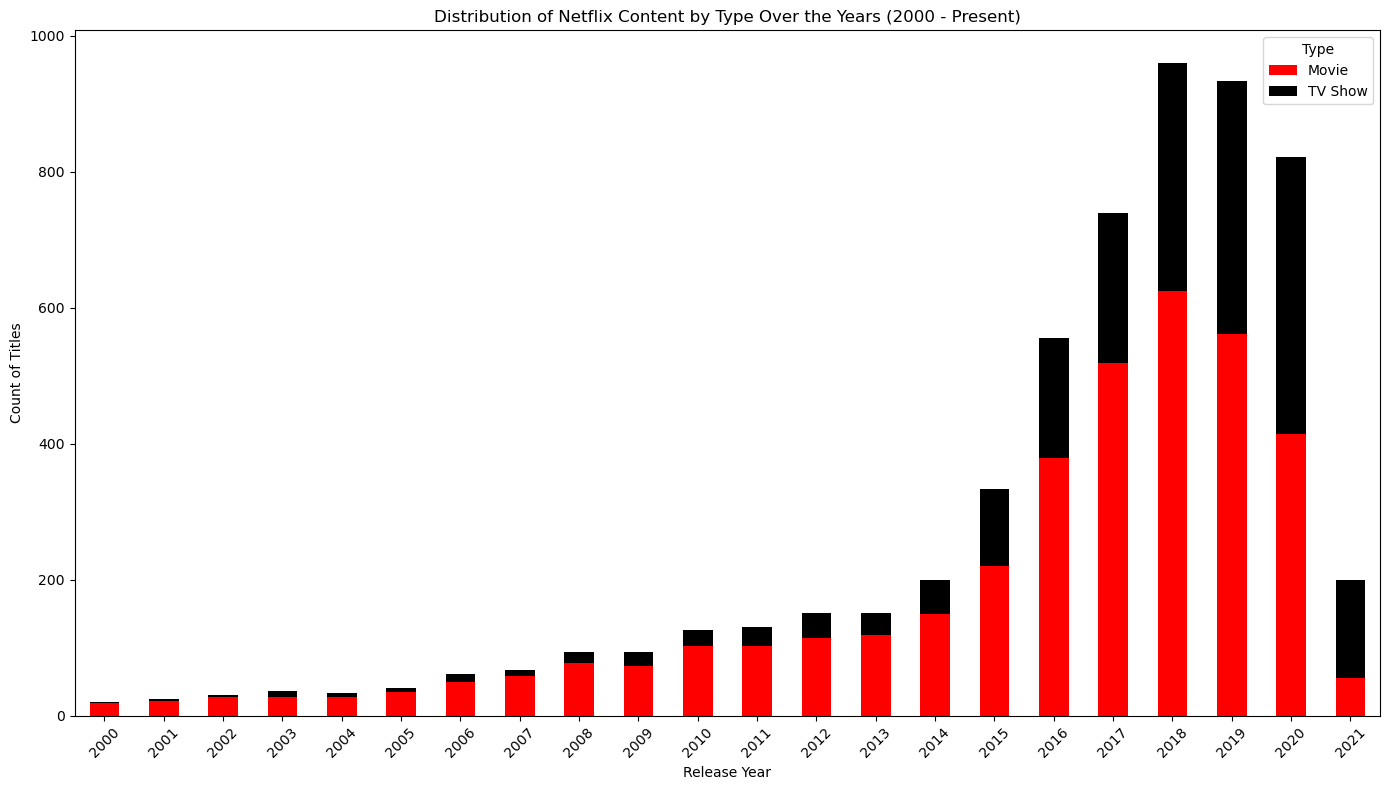

In [13]:
type_distribution = final_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
filtered_type_distribution = type_distribution[type_distribution.index >= 2000]
filtered_type_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), color=['red', 'black'])
plt.title('Distribution of Netflix Content by Type Over the Years (2000 - Present)')
plt.xlabel('Release Year')
plt.ylabel('Count of Titles')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

### VISUALIZATION 2 - Contributed By Rithwik

The box plot shows IMDb score distributions across various Netflix genres, the hypothesis could be exploring the quality of content as seen by viewers across different genres. The intent of this analysis is to identify which genres consistently deliver content that is highly rated, as well as to understand the range and distribution of viewer opinions within each genre. Such insights can be useful for Netflix's decisions regarding which genres to invest in and what type of content to prioritize in order to maintain high viewer satisfaction and engagement. The dots outside the boxes seen are the outliers. They represent IMDb scores that fall outside the typical range (IQR), either unusually high or low compared to the bulk of scores in that genre.

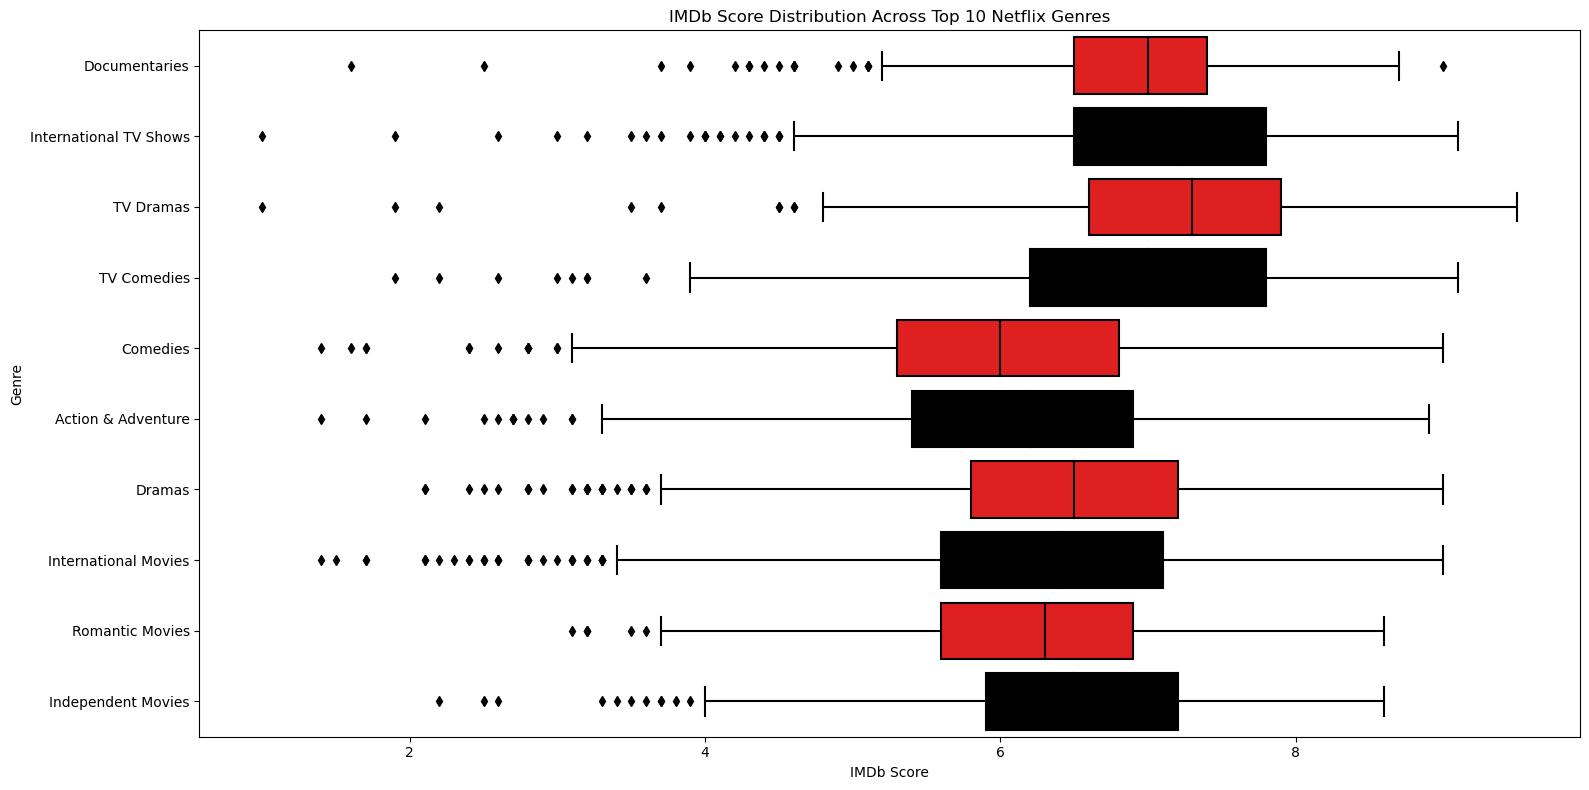

In [14]:
exploded_genres = final_df.assign(listed_in=final_df['listed_in'].str.split(', ')).explode('listed_in')
filtered_genres = exploded_genres[exploded_genres['IMDb Score'].notnull()]

# Focus on the top 10 most common genres
top_genres = filtered_genres['listed_in'].value_counts().head(10).index
filtered_genres_top = filtered_genres[filtered_genres['listed_in'].isin(top_genres)]

# Plotting
plt.figure(figsize=(16, 8))
sns.boxplot(data=filtered_genres_top, x='IMDb Score', y='listed_in', palette=["red", "black"])
plt.title('IMDb Score Distribution Across Top 10 Netflix Genres')
plt.xlabel('IMDb Score')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

### VISUALIZATION 3 - Contributed By Rohith

Placing these histograms side by side offers a comparative view of content longevity and investment on Netflix. While movies provide a one-off entertainment experience, TV shows require a more extended commitment from viewers and creators alike. The significant number of movies and the preponderance of TV shows with fewer seasons underscore Netflix's dual strategy: maintaining a broad movie library to cater to diverse tastes and experimenting with TV series to cultivate dedicated viewership over multiple seasons.Netflix's content portfolio, as suggested by these distributions, might be strategically designed to balance between offering a wide variety of one-time cinematic experiences and developing serialized content that has the potential to build a loyal viewer base over time.Overall, these visualizations shed light on the structure of Netflix's content offerings, suggesting strategic choices in content creation and acquisition to meet diverse viewer preferences and enhance the platform's appeal.

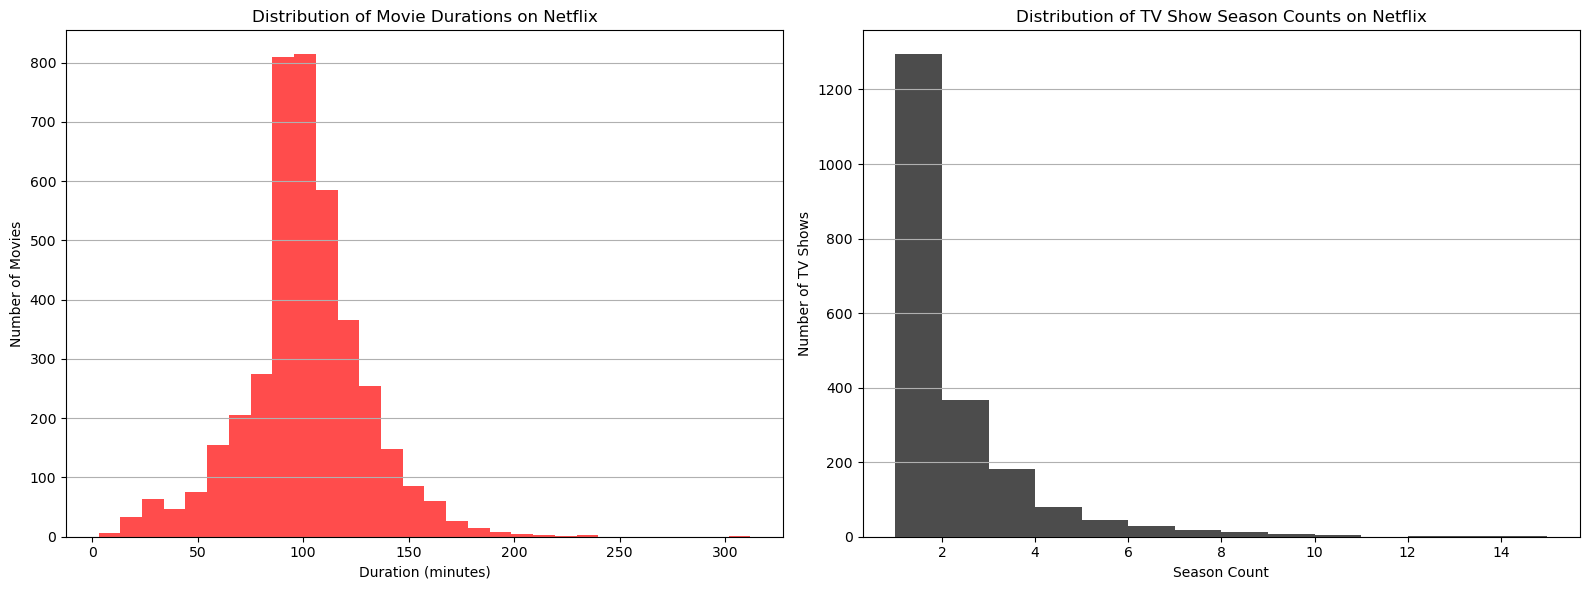

In [15]:
movies_df = final_df[final_df['type'] == 'Movie'].copy() 
movies_df['duration_min'] = movies_df['duration'].str.extract('(\d+)').astype(float)

tv_shows_df = final_df[final_df['type'] == 'TV Show'].copy()  
tv_shows_df['season_count'] = tv_shows_df['duration'].str.extract('(\d+)').astype(float)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Histogram for movie durations on the left
axs[0].hist(movies_df['duration_min'], bins=30, color='red', alpha=0.7)
axs[0].set_title('Distribution of Movie Durations on Netflix')
axs[0].set_xlabel('Duration (minutes)')
axs[0].set_ylabel('Number of Movies')
axs[0].grid(axis='y')

# Histogram for TV show season counts on the right
axs[1].hist(tv_shows_df['season_count'], bins=range(1, int(tv_shows_df['season_count'].max()) + 1), color='black', alpha=0.7)
axs[1].set_title('Distribution of TV Show Season Counts on Netflix')
axs[1].set_xlabel('Season Count')
axs[1].set_ylabel('Number of TV Shows')
axs[1].grid(axis='y')

# Adjusting layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()


### VISUALIZATION 4 - Contributed By Rithwik

This is a word cloud for the horror genre, which is a visual representation of text data where the size of each word indicates its frequency or importance within a certain context—in this case, likely keywords associated with horror movies or TV shows on a platform such as Netflix. Prominent words like "horror," "mysterious," "supernatural," and "family," among others, suggest common themes and elements that audiences might expect from horror content. The hypothesis behind creating such a word cloud could be to visually analyze and present the most frequent elements or themes that define the horror genre on netflix. This can help content creators and marketers to understand popular tropes within the genre and tailor their productions and promotions to match audience expectations and trends.

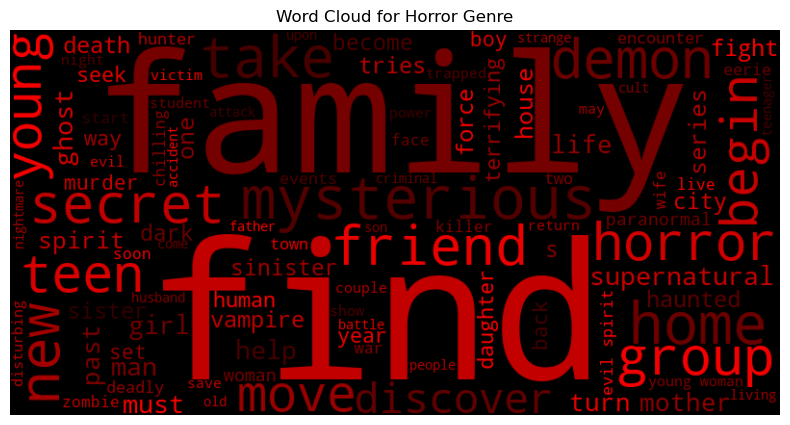

In [16]:
# Choosing the spcific genre
selected_genre = 'Horror'

genre_df = final_df[final_df['listed_in'].str.contains(selected_genre, case=False, na=False)]

descriptions = ' '.join(genre_df['description'].dropna().values).lower()

stopwords = set(STOPWORDS)

def red_black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(10, 50)

wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=stopwords, max_words=100, color_func=red_black_color_func).generate(descriptions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {selected_genre} Genre')
plt.show()

In [17]:
# Filtering the dataset for titles in the "Horror" genre with "family" in the title or description
horror_family_in_titles_or_descriptions = final_df[(final_df['listed_in'].str.contains("Horror", case=False, na=False)) & 
                                                   (final_df['title'].str.contains("family", case=False, na=False) |
                                                    final_df['description'].str.contains("family", case=False, na=False))]

# Listing all the titles that match the criteria
horror_family_in_titles_or_descriptions_list = horror_family_in_titles_or_descriptions['title'].tolist()

horror_family_in_titles_or_descriptions_list

['Dark Skies',
 'Winchester',
 'Haunted',
 'Insidious',
 'The Conjuring',
 'Chilling Adventures of Sabrina',
 'Cadaver',
 'The Blue Elephant 2',
 'The Darkness',
 'Curon',
 'Dark Light',
 'Vampires',
 'Vampires',
 'Girl on the Third Floor',
 'October Faction',
 'It Comes at Night',
 'Typewriter',
 'Scare Tactics',
 'The Silence',
 'The Silence',
 'The Silence',
 'Await Further Instructions',
 'Nang Nak',
 'The Haunting of Hill House',
 'The Maus',
 'Family Blood',
 'The House Next Door',
 'Laddaland',
 'Lupt',
 'Stephanie',
 'The Witch']

The presence and size of "family" in the word cloud indicate its frequency in the descriptions of horror titles, not necessarily in the titles themselves. Even if "Family Blood" is the only title with "family" in it, the word could be a common theme or keyword used across multiple descriptions within the horror genre. This suggests that the concept of "family" is a significant theme explored in the descriptions of horror content on Netflix, potentially indicating plots that involve family dynamics or settings. Word clouds analyze the frequency of words in text data (in this case, descriptions), hence "family" appearing prominently reflects its repeated mention in the context provided, rather than its appearance in titles.

### VISUALIZATION 5 - Contributed By Asritha

Average IMDb Score by Primary Genre
Hypothesis: The success of new titles can be partially predicted by their genre, with certain genres consistently performing better in terms of viewer ratings.
Explanation: This bar chart displays the average IMDb score (used as a proxy for title success) for various primary genres. Higher average scores suggest that titles within these genres tend to be received more favorably by audiences, potentially indicating a safer investment for new productions.
Why It's Interesting: By understanding which genres are more likely to yield successful titles, Netflix can make informed decisions about which types of new content to develop or acquire. This insight can guide strategic planning and resource allocation to maximize audience engagement and satisfaction.
Responsible Member: Casey, focusing on predicting the success of new titles, would find this analysis invaluable. It provides a data-driven basis for forecasting the potential reception of titles based on their genre, aiding in the strategic selection of content.

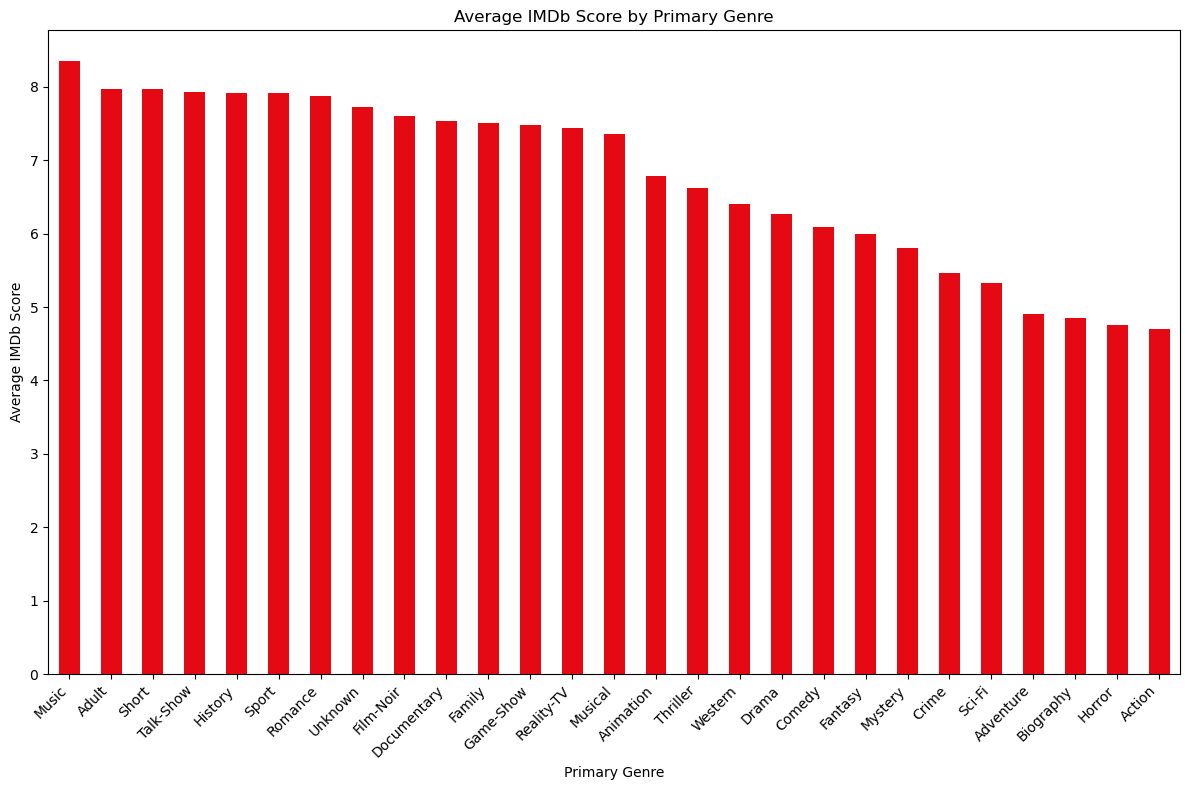

In [18]:
final_df['Primary Genre'] = final_df['Genre'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else 'Unknown')

# Calculating the average IMDb score (using 'Hidden Gem Score' as a proxy here) by primary genre
avg_imdb_score_by_genre = final_df.groupby('Primary Genre')['Hidden Gem Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
avg_imdb_score_by_genre.plot(kind='bar', color='#E50914')  # Netflix red
plt.title('Average IMDb Score by Primary Genre')
plt.xlabel('Primary Genre')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### VISUALIZATION 6 - Contributed By Sanjna

The scatter plot of viewer ratings (IMDb Score) against the release year for Netflix titles offers a way to assess the perceived quality of content over time. This visualization can uncover insights such as:
Content Quality Over Time: By observing the distribution of ratings across different release years, you can evaluate whether the quality of content, as rated by viewers, has been consistent, improved, or declined over time.
High-Quality Content Identification: Identifying titles with high ratings across different eras can help pinpoint standout content, which can be further analyzed to understand the characteristics of successful titles.


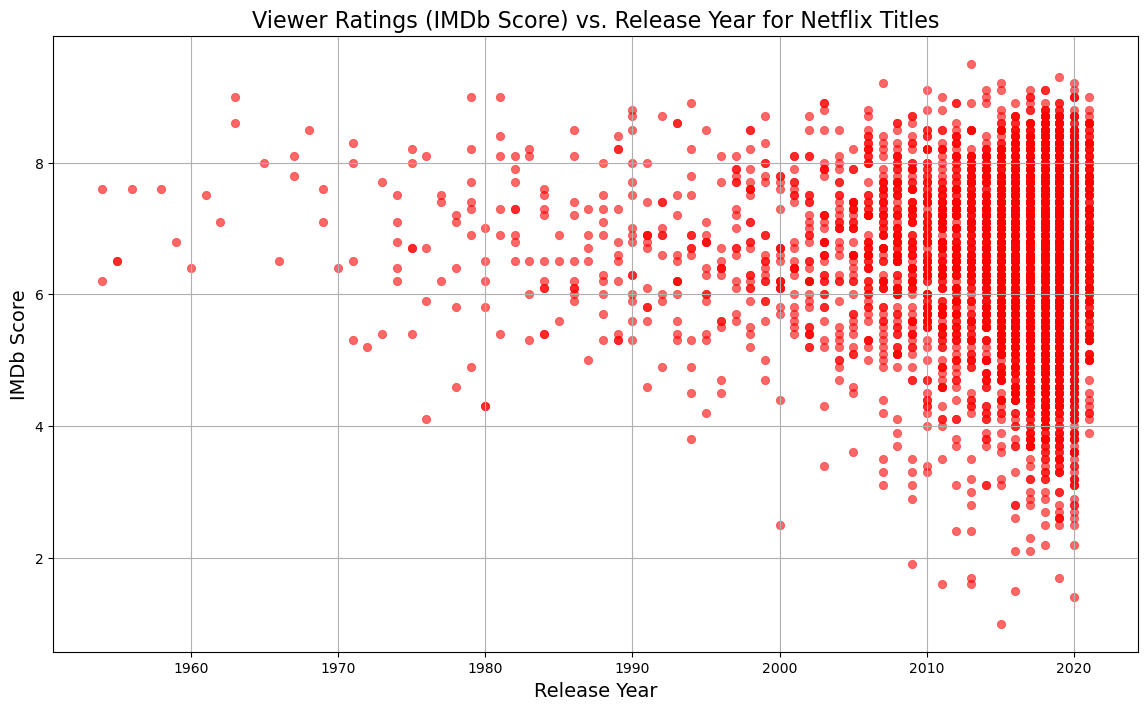

In [19]:
final_df_filtered = final_df.replace('Unknown', np.nan).dropna(subset=['IMDb Score', 'release_year'])

final_df_filtered['IMDb Score'] = pd.to_numeric(final_df_filtered['IMDb Score'])

plt.figure(figsize=(14, 8))
sns.scatterplot(data=final_df_filtered, x='release_year', y='IMDb Score', alpha=0.6, edgecolor=None, color='red')
plt.title('Viewer Ratings (IMDb Score) vs. Release Year for Netflix Titles', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('IMDb Score', fontsize=14)
plt.grid(True)
plt.show()

### VISUALIZATION 7 - Contributed By Bhargavaram

The bubble chart visualizes the number of shows or movies released per year, with each bubble's size proportional to the release count. This type of visualization is quite effective for showing the volume of output in a given year relative to others, as the differences are immediately apparent through bubble size.

Insights from the Bubble Chart:

The trend shows a relatively low and stable number of releases from the 1950s up to around the late 1990s.
Starting in the late 1990s, there's a noticeable upward trend in the number of releases.
There is a particularly large increase in releases in recent years, with the largest bubbles appearing towards the right side of the chart, indicating a possible boom in the industry or a change in the way content is produced and released (such as the rise of streaming services).

Problems Addressed:

Industry Growth: The chart could be addressing the problem of visualizing the growth of the film and TV industry over time.
Content Production Analysis: It also aims at analyzing how content production has responded to technological changes and market demand.

Content Production Analysis: It aims at analyzing how content production has responded to technological changes and market demand.

Reasons for Choosing a Bubble Chart:

Visual Impact: The bubble chart provides a visual impact that highlights the volume difference more dramatically than a line or bar chart could.
Data Representation: It allows for an additional dimension (size of the bubble) to represent data, in this case, the number of releases, which can be more engaging and informative.

Reflection on the Visualization:
Scalability: The size of the bubbles are carefully scaled so that they represent the data accurately without overwhelming the chart.
Data Source Reliability: Considering the reliability and completeness of the data source, as the sharp increase in recent years may reflect changes in data collection methods or market disruptions.

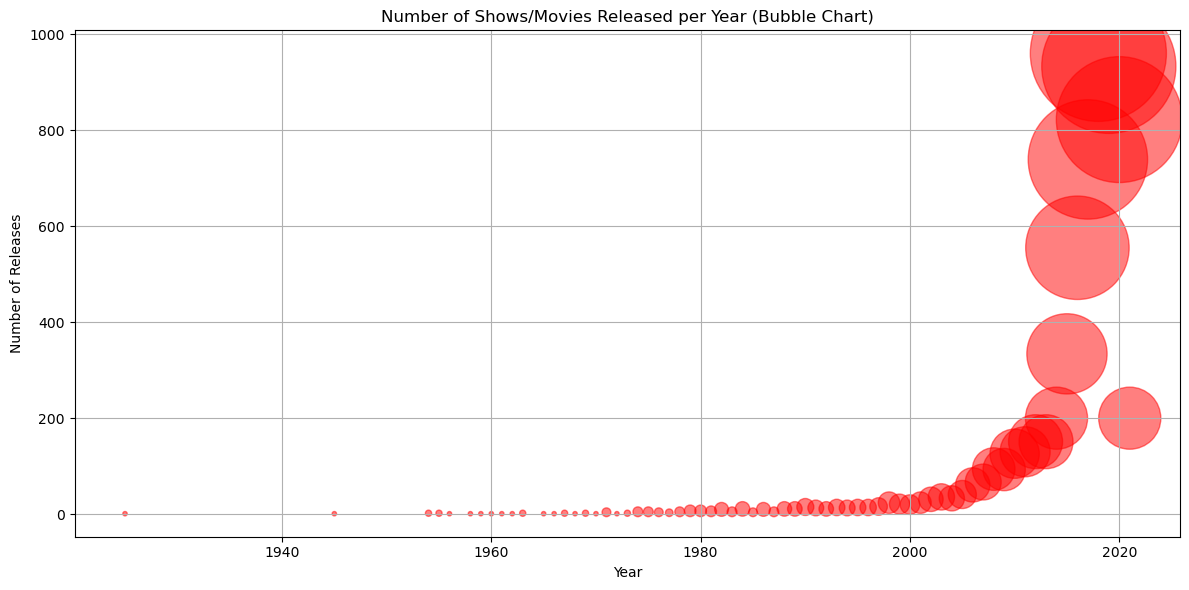

In [20]:
release_counts = final_df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
bubble_sizes = release_counts * 10 
plt.scatter(release_counts.index, release_counts.values, s=bubble_sizes, alpha=0.5, color='red')
plt.title('Number of Shows/Movies Released per Year (Bubble Chart)')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.tight_layout()
plt.show()

## Machine Learning Analysis

#### Machine Learning Analysis - 1

#### Can we forecast future trends in the types of content (genres, themes) that will be added to Netflix, based on historical data? - Contributed By Rohith and Rithwik.

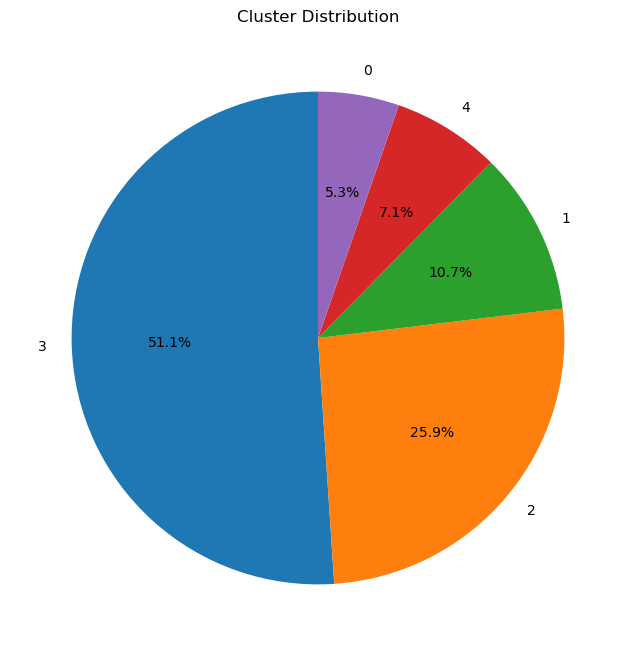

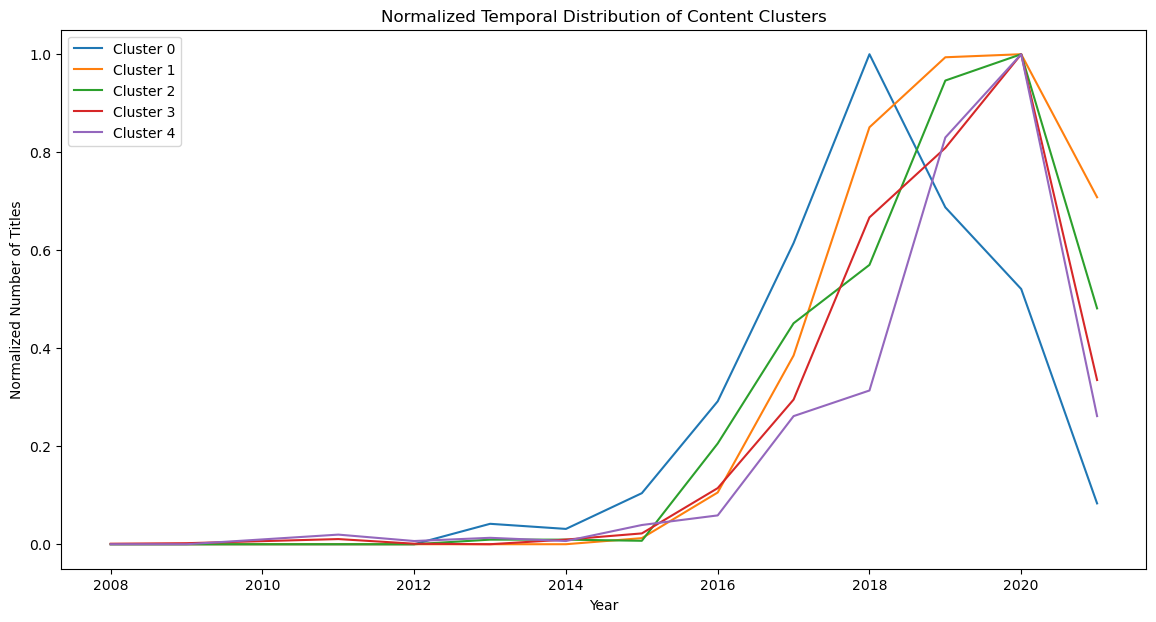

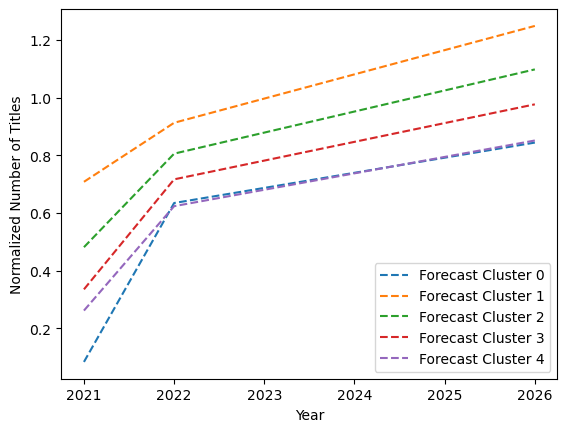

Predictions for Cluster 0: [0.63452459 0.68693125 0.73933791 0.79174458 0.84415124]
Predictions for Cluster 1: [0.91284604 0.99683634 1.08082664 1.16481694 1.24880724]
Predictions for Cluster 2: [0.80576021 0.87882447 0.95188873 1.02495299 1.09801725]
Predictions for Cluster 3: [0.71662971 0.78167681 0.8467239  0.91177099 0.97681808]
Predictions for Cluster 4: [0.62357439 0.68052072 0.73746706 0.7944134  0.85135974]


In [21]:
# Data cleaning and preparation
final_df['date_added'] = pd.to_datetime(final_df['date_added'], errors='coerce')
final_df = final_df.dropna(subset=['date_added'])
final_df['year_added'] = final_df['date_added'].dt.year

# Feature engineering: Text features vectorization
final_df['text_features'] = final_df['listed_in'].fillna('') + ' ' + final_df['description'].fillna('')
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(final_df['text_features'])

# Optimal cluster determination and clustering
optimal_clusters = 5 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
final_df['cluster'] = kmeans.fit_predict(X)

# Pie chart for the cluster distribution
cluster_distribution = final_df['cluster'].value_counts(normalize=True)
plt.figure(figsize=(8, 8))
plt.pie(cluster_distribution, labels=cluster_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Cluster Distribution')
plt.show()

# Temporal distribution of clusters
yearly_cluster_distribution = final_df.groupby(['year_added', 'cluster']).size().unstack(fill_value=0)

# Normalization for comparison
scaler = MinMaxScaler()
normalized_cluster_distribution = scaler.fit_transform(yearly_cluster_distribution)
normalized_cluster_distribution = pd.DataFrame(normalized_cluster_distribution, 
                                               index=yearly_cluster_distribution.index, 
                                               columns=yearly_cluster_distribution.columns)

# Multiline graph for temporal distribution
plt.figure(figsize=(14, 7))
for cluster in range(optimal_clusters):
    plt.plot(normalized_cluster_distribution.index, normalized_cluster_distribution[cluster], label=f'Cluster {cluster}')
plt.title('Normalized Temporal Distribution of Content Clusters')
plt.xlabel('Year')
plt.ylabel('Normalized Number of Titles')
plt.legend()
plt.show()

# Forecasting with Linear Regression
X = normalized_cluster_distribution.index.values.reshape(-1, 1)
future_years = np.arange(X[-1][0] + 1, X[-1][0] + 6).reshape(-1, 1)
forecasts = {}

for cluster in range(optimal_clusters):
    y = normalized_cluster_distribution[cluster].values
    model = LinearRegression()
    model.fit(X, y)
    prediction = model.predict(future_years)
    forecasts[cluster] = prediction
    plt.plot(list(range(X[-1][0], X[-1][0] + 6)), np.concatenate([y[-1:], prediction]), '--', label=f'Forecast Cluster {cluster}')


plt.xlabel('Year') 
plt.ylabel('Normalized Number of Titles')
plt.legend()
plt.show()

for cluster, forecast in forecasts.items():
    print(f'Predictions for Cluster {cluster}: {forecast}')


##### Cluster Distribution Pie Chart
This chart shows the proportion of Netflix titles that fall into each cluster at the last point in the dataset. The clusters were determined through K-means clustering, which groups titles based on similarity in features derived from genre and description data. The pie chart indicates which types of content are most common on Netflix, with the larger slices representing more commonly occurring themes or genres.
##### Normalized Temporal Distribution of Content Clusters Line Chart
The line chart plots the normalized count of titles in each cluster over time, allowing for a comparison of trends across clusters regardless of their sizes. This visualization shows how the presence of each content type has evolved over the years on Netflix. Peaks may indicate times when specific themes or genres were particularly popular or heavily added to Netflix's library.
##### Cluster Forecasts Line Chart
This chart presents the predictions for the normalized size of each cluster for the next five years, obtained through linear regression modeling. These predictions are based on past trends and assume that the historical linear trend will continue into the future. The dotted lines extending from the last historical data point for each cluster represent these forecasts.
##### Insights from the Graphs
Dominant Content Types: The pie chart and the historical data part of the line chart may reveal certain content types that Netflix has focused on in the past.
Content Trends: The historical trends can indicate shifts in Netflix's content strategy, showing which types of content are gaining or losing prominence.
Predicted Changes: The forecast shows an expected increase in normalized sizes for all clusters. This suggests that each cluster's themes or genres are expected to grow in proportion relative to the maximum size observed in the data, which may inform strategic decisions about content creation and acquisition.


##### Interpretation of Results and Baseline Comparison

Baseline Comparison: The linear regression model used for forecasting provides a baseline for comparison. 

Results: The results obtained helps understanding that ML models, especially those based on simple linear trends, have limitations. They cannot account for sudden changes in industry trends, viewer preferences, or strategic shifts by Netflix that diverge from historical patterns.
##### Final Thoughts
Overall, these analyses can be valuable for Netflix or content creators in predicting future content strategies based on historical data. which helps in answewring the question like; Can we forecast future trends in the types of content (genres, themes) that will be added to Netflix, based on historical data?

### Machine Learning Analysis - 2

### Can we predict the success of the title ? - Contributed By Asritha and Sanjna.

In [22]:
final_df = final_df.dropna(subset=['IMDb Score'])

final_df['genre'] = final_df['listed_in'].apply(lambda x: ','.join(x) if isinstance(x, list) else x)
final_df['Country Availability'] = final_df['Country Availability'].apply(lambda x: ','.join(x) if isinstance(x, list) else x)
final_df['Boxoffice'] = final_df['Boxoffice'].replace('[\$,]', '', regex=True).astype(float)

features = ['Hidden Gem Score','Boxoffice','rating','title','Writer','Languages','IMDb Votes','release_year','Production House','Awards Nominated For','Awards Received','type','listed_in','Country Availability', 'director', 'cast', 'country']
X = final_df[features]
y = final_df['IMDb Score']  

numeric_features = ['Hidden Gem Score','Boxoffice','release_year','IMDb Votes']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())
])

categorical_features = ['rating','title','Writer','Languages','Production House','Awards Nominated For','Awards Received', 'type', 'Country Availability', 'director', 'cast', 'country']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
 
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = RandomForestRegressor(n_estimators=100, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
n = X_test.shape[0]  
p = X_test.shape[1]  
adjusted_r2 = 1 - (1-r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R² Score: {adjusted_r2}')

Mean Squared Error: 0.18762125357142848
R² Score: 0.8698183459808185
Adjusted R² Score: 0.8678100990494881


 The aim here is to build a predictive model that can accurately estimate the IMDb scores of Netflix titles using available features. We are predicting IMDb scores of Netflix titles based on various features such as 'Hidden Gem Score', 'Boxoffice', 'rating', 'director', 'cast', 'country', etc. This model uses a Random Forest Regressor. The evaluation metrics used are Mean Squared Error (MSE), R² Score, and Adjusted R² Score. Contributed By Asritha and Bhargavaram.

In [23]:
if final_df['duration'].dtype == object:
    final_df['duration'] = final_df['duration'].str.extract('(\d+)').astype(float)

final_df['Boxoffice'] = final_df['Boxoffice'].replace('Unknown', pd.NA)
final_df['Boxoffice'] = pd.to_numeric(final_df['Boxoffice'], errors='coerce')
final_df['Boxoffice'].fillna(final_df['Boxoffice'].median(), inplace=True)

numeric_features = ['Hidden Gem Score', 'IMDb Votes', 'Awards Received', 'Awards Nominated For', 'Boxoffice']
categorical_features = ['type', 'director', 'cast', 'country', 'release_year', 'rating', 'listed_in', 'Genre']

placeholders = {feature: final_df[feature].median() if final_df[feature].dtype in ['float64', 'int64'] else final_df[feature].mode()[0] for feature in numeric_features + categorical_features}

selected_features = numeric_features + categorical_features
X = final_df[selected_features]
y = final_df['IMDb Score']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_pipeline.fit(X_train, y_train)

y_pred = regression_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.19758577697321436
R² Score: 0.8629044270443187


Determining whether a Netflix title has a high IMDb score (defined as IMDb score >= 7.0) based on features such as 'Hidden Gem Score', 'IMDb Votes', 'Awards Received', 'Awards Nominated For', 'Boxoffice', 'type', 'director', 'cast', 'country', 'release_year', 'rating', and 'listed_in'. This model employed for this task is a Random Forest Classifier. The evaluation metrics used are Accuracy and Classification Report metrics (Precision, Recall, F1-score). The objective here is to develop a classification model that accurately predicts whether a Netflix title will have a high IMDb score or not.

In [24]:
def compute_dynamic_placeholders():
    # Assuming `final_df` is globally accessible or passed as a parameter
    numeric_features = ['Hidden Gem Score', 'IMDb Votes', 'Awards Received', 'Awards Nominated For', 'Boxoffice']
    categorical_features = ['cast', 'release_year', 'rating', 'listed_in']
    placeholders = {
        **{feature: final_df[feature].median() if final_df[feature].dtype in ['float64', 'int64'] else final_df[feature].mode()[0] for feature in numeric_features},
        **{feature: final_df[feature].mode()[0] for feature in categorical_features}
    }
    return placeholders

def collect_user_input():
    print("Please enter the details for the prediction:")
    user_input = {
        'type': input("Enter type (Movie/TV Show): "),
        'director': input("Enter director: "),
        'country': input("Enter country: "),
        'Genre': input("Enter genre: ")
    }
    return user_input

def predict_imdb_score_with_placeholders(user_input):
    placeholders = compute_dynamic_placeholders()
    
    full_input = {**placeholders, **user_input}
    input_df = pd.DataFrame([full_input])
    
    predicted_score = regression_pipeline.predict(input_df)
    return predicted_score[0] 

user_input = collect_user_input()

predicted_imdb_score = predict_imdb_score_with_placeholders(user_input)
print(f"Predicted IMDb Score: {predicted_imdb_score:.2f}")

Please enter the details for the prediction:
Enter type (Movie/TV Show): Movie
Enter director: SS Rajamouli
Enter country: India
Enter genre: Action
Predicted IMDb Score: 6.05


### Machine Learning Analysis - 3

#### Can we predict whether a title is a Movie or a TV Show based on features like country, release_year, and IMDb Score Contributed By Sanjna.

In [25]:
features = ['country', 'release_year', 'IMDb Score']
X = final_df[features]
y = final_df['type']

X_clean = X.dropna()
y_clean = y[X.index.isin(X_clean.index)]
X_clean_encoded = pd.get_dummies(X_clean, columns=['country'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_clean_encoded, y_clean, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
baseline_accuracy = max(y_test.value_counts(normalize=True))
print(f'Baseline Accuracy: {baseline_accuracy}')

Accuracy: 0.7517857142857143
Baseline Accuracy: 0.6705357142857142


In this binary classification problem, we aim to predict whether a Netflix title is a "Movie" or a "TV Show" using features such as the country of production, release year, and IMDb score. The workflow begins with data preprocessing, where missing values in these features are addressed by omitting incomplete records, ensuring the model trains on fully informed data. The categorical nature of the 'country' variable necessitates one-hot encoding, transforming it into a format suitable for machine learning models, which typically require numerical input. This process creates individual binary features for each country, enabling the model to understand and utilize geographical information effectively.

The dataset is then divided, with 80% allocated for training the Random Forest Classifier—an ensemble method known for its robustness and ability to prevent overfitting by averaging multiple decision trees—and 20% reserved for testing its performance. The model's accuracy is gauged by comparing predicted labels against actual labels in the test set, providing insight into its predictive capabilities. To contextualize the model's effectiveness, its accuracy is juxtaposed with a baseline accuracy, derived from the most frequent class in the test data. The model's accuracy of 0.7600 indicates that it correctly predicts whether a Netflix title is a "Movie" or a "TV Show" 76% of the time, which is a notable improvement over the baseline accuracy of 0.6887.

## Results and Conclusions

The project underscores the dynamic nature of content management in the streaming industry and highlights the importance of data-driven decision-making in shaping content strategies. By effectively predicting what new titles are likely to succeed, Netflix can better allocate resources, tailor content for specific markets, and stay ahead in the highly competitive streaming landscape. The findings from this project not only benefit strategic planning but also provide a framework for continuous improvement and adaptation to changing viewer preferences and market dynamics.

#### Summary of Findings:

##### Growth of Netflix Library: 
Over the years, Netflix has significantly expanded its content library, with a steady increase in the number of movies and TV shows available to its subscribers. This expansion reflects Netflix's strategy to cater to a broad range of viewer preferences and demographics.
##### Content Composition: 
The analysis highlighted that movies constitute the larger portion of Netflix’s catalog, outnumbering TV shows. This might suggest a strategic focus on films, potentially due to their wider appeal or shorter commitment compared to series.
##### Recent Content Influx: 
A significant portion of Netflix's offerings were produced and released in the last twenty years, indicating an emphasis on modern and contemporary content, likely to attract a younger audience base.
##### Geographical Availability: 
The United States boasts the largest selection of Netflix titles, closely followed by Canada. This suggests a strategic focus on North American audiences, who perhaps represent a significant portion of Netflix's market share.
##### Diversity in Filmmaking: 
Netflix's strategy includes a mix of content from both renowned directors and emerging talents, which helps in maintaining a diverse and dynamic catalog appealing to various viewer tastes and preferences.

#### Problem Statements Addressed:

##### Evolution of Content Types:
The project successfully tracked how the popularity and presence of different content types have evolved over time, noting an increasing trend towards adding newer and diverse genres.
##### Content Strategies by Region: 
By analyzing content availability in various countries, we could deduce regional content strategies, which are crucial for Netflix to maintain relevancy in diverse markets.
##### Prediction of Title Success: 
Our predictive models aimed at forecasting the success of new titles were pivotal. We utilized descriptive, predictive, and prescriptive analyses to not only predict outcomes but also suggest actionable strategies based on the data.


## Conclusion

As we look to the future, our plan is to build a dashboard that offers a straightforward and engaging user experience, drawing on our assembled datasets. This platform will allow users to easily interact with and analyze our findings through linked visualizations and other features.We're also excited about integrating our machine learning models into this user interface, providing users with the capability to predict the potential success of movies. This step will bridge the gap between data science and practical application, delivering our insights in a user-centric way that emphasizes ease of use and clarity.We are also planning to see whether we can create any other models which could be helpful for getting insights of netflix or for generating any revenue for netflix.
Developing more advanced analytical models using state-of-the-art machine learning techniques like deep learning could also be explored to improve prediction accuracy. This includes using natural language processing to analyze viewer reviews and comments for sentiment analysis, which could further refine success predictions and content recommendations.

Another important area for future work is the exploration of personalized content strategies. By leveraging user-specific data to predict individual preferences, Netflix can tailor content more effectively to various viewer segments. This personalized approach could enhance viewer satisfaction and retention rates.Lastly, expanding the geographic focus of the analysis to include emerging markets could uncover new opportunities for growth. Understanding regional content preferences and constraints will help Netflix tailor its offerings to fit diverse cultural contexts, potentially driving expansion in international subscriber bases.

Overall, by continuing to innovate and expand on the data-driven strategies outlined in this project, Netflix can maintain its competitive edge in the rapidly evolving digital streaming landscape.

## Additional Work

Apart from the visualizations discussed earlier, we have developed a comprehensive dashboard that includes several static visualizations directly addressing our project's problem statements. Additionally, the dashboard features an interactive visualization (Multi-linked visualization) where users have the option to select a specific TV show or movie. Once selected, the genres associated with that title are displayed in a dynamic bubble chart. Selecting a genre from this chart triggers a word cloud display, highlighting the most common words used in that genre, offering insights into thematic elements and content styles.

Furthermore, the dashboard is integrated with our predictive model, providing a user-friendly interface where inputs can be submitted to predict the IMDb score and assess the potential success of future movie titles. This feature enhances the dashboard’s utility, making it a valuable tool for both analysis and prediction.

To facilitate a better understanding and accessibility of our dashboard, we have uploaded a video walkthrough to a Google Drive link, which showcases its functionality and various features in action. This resource is intended to help stakeholders and team members effectively utilize the dashboard for strategic decision-making and content planning.

### GITHUB Repo : https://github.com/Rohith1110/Datascience_Project
### Google drive link : 